# Kickstarter Modelling Prediction

## Logistic regression

In [21]:
import numpy as np
import pandas as pd

ks_data = pd.read_csv("kickstarter.csv", sep=';')
# ks_data = pd.read_csv("kickstarter.csv", sep=';', skipfooter=369400, engine='python')

# raw data
ks_data.head(15)

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
0,Poetry,Publishing,GBP,10/9/15 12:00 AM,1000.0,8/11/15 12:00 AM,0.00,failed,0.0,GB
1,Narrative Film,Film & Video,USD,11/1/17 12:00 AM,30000.0,9/2/17 12:00 AM,2421.00,failed,15.0,US
2,Narrative Film,Film & Video,USD,2/26/13 12:00 AM,45000.0,1/12/13 12:00 AM,220.00,failed,3.0,US
3,Music,Music,USD,4/16/12 12:00 AM,5000.0,3/17/12 12:00 AM,1.00,failed,1.0,US
4,Restaurants,Food,USD,4/1/16 12:00 AM,50000.0,2/26/16 12:00 AM,52375.00,successful,224.0,US
5,Film & Video,Film & Video,USD,8/29/15 12:00 AM,19500.0,7/4/15 12:00 AM,1283.00,NaN,14.0,US
6,Food,Food,USD,12/21/14 12:00 AM,1000.0,12/1/14 12:00 AM,1205.00,successful,16.0,US
7,Drinks,Food,USD,3/17/16 12:00 AM,25000.0,2/1/16 12:00 AM,453.00,failed,40.0,US
8,Product Design,Design,USD,5/29/14 12:00 AM,125000.0,4/24/14 12:00 AM,8233.00,NaN,58.0,US
9,Documentary,Film & Video,USD,8/10/14 12:00 AM,65000.0,7/11/14 12:00 AM,6240.57,NaN,43.0,US


In [22]:
# remove outliers from label
ks_data = ks_data.mask(ks_data.eq('NaN')).dropna()

# generate project age attribute
ks_data['launched'] = pd.to_datetime(ks_data['launched'])
ks_data['deadline'] = pd.to_datetime(ks_data['deadline'])
ks_data['project_age']=((ks_data['deadline'] - ks_data['launched']) / pd.offsets.Day(1))

# remove deadline and launched attribute
del ks_data['deadline']
del ks_data['launched']

ks_data.head(15)

,category,main_category,currency,goal,pledged,state,backers,country,project_age
0,Poetry,Publishing,GBP,1000.0,0.0,failed,0.0,GB,59.0
1,Narrative Film,Film & Video,USD,30000.0,2421.0,failed,15.0,US,60.0
2,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3.0,US,45.0
3,Music,Music,USD,5000.0,1.0,failed,1.0,US,30.0
4,Restaurants,Food,USD,50000.0,52375.0,successful,224.0,US,35.0
6,Food,Food,USD,1000.0,1205.0,successful,16.0,US,20.0
7,Drinks,Food,USD,25000.0,453.0,failed,40.0,US,45.0
10,Nonfiction,Publishing,CAD,2500.0,0.0,failed,0.0,CA,30.0
11,Indie Rock,Music,USD,12500.0,12700.0,successful,100.0,US,30.0
12,Crafts,Crafts,USD,5000.0,0.0,failed,0.0,US,30.0


In [23]:
# category, main_category, currency, country, state to numerical
ks_data['category'] = pd.factorize(ks_data['category'])[0]
ks_data['main_category'] = pd.factorize(ks_data['main_category'])[0]
ks_data['currency'] = pd.factorize(ks_data['currency'])[0]
ks_data['country'] = pd.factorize(ks_data['country'])[0]
ks_data['state'] = pd.factorize(ks_data['state'])[0]

# move state to end
ks_data_state = ks_data.pop('state')
ks_data['state'] = ks_data_state

ks_data.head(15)

,category,main_category,currency,goal,pledged,backers,country,project_age,state
0,0,0,0,1000.0,0.0,0.0,0,59.0,0
1,1,1,1,30000.0,2421.0,15.0,1,60.0,0
2,1,1,1,45000.0,220.0,3.0,1,45.0,0
3,2,2,1,5000.0,1.0,1.0,1,30.0,0
4,3,3,1,50000.0,52375.0,224.0,1,35.0,1
6,4,3,1,1000.0,1205.0,16.0,1,20.0,1
7,5,3,1,25000.0,453.0,40.0,1,45.0,0
10,6,0,2,2500.0,0.0,0.0,2,30.0,0
11,7,2,1,12500.0,12700.0,100.0,1,30.0,1
12,8,4,1,5000.0,0.0,0.0,1,30.0,0


In [24]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionWithSGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# LBFGS = Limited Memory Broyden–Fletcher–Goldfarb–Shanno

# split training and testing 8:2
ks_train, ks_test = train_test_split(ks_data, test_size=0.2)

# create model
ks_df = spark.createDataFrame(ks_train)
ks_rdd = ks_df.rdd.map(lambda x: LabeledPoint(x[8], x[:7])).collect()
ks_lrm = LogisticRegressionWithLBFGS.train(sc.parallelize(ks_rdd))

# test data
ks_test_df = spark.createDataFrame(ks_test)
ks_test_rdd = ks_test_df.rdd.map(lambda x: x[:7]).collect()
ks_lrm_pred_result = ks_lrm.predict(sc.parallelize(ks_test_rdd)).collect()

print(np.array(ks_lrm_pred_result))
print(np.array(ks_test['state']))

# accuracy score
ks_lrm_score = accuracy_score(np.array(ks_lrm_pred_result), np.array(ks_test['state'])) * 100

print(str(ks_lrm_score) + '%')


[0 1 1 ... 1 1 0]
[0 1 1 ... 1 1 0]
99.92212808372788%


[[25928     0]
 [   50 38230]]


/Users/kemalelmizan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


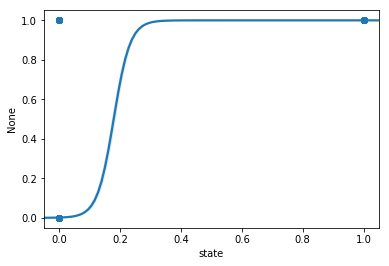

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = pd.Series(ks_test['state'])
y_pred = pd.Series(ks_lrm_pred_result)

print(confusion_matrix(y_true, y_pred, labels=[1, 0]))

sns.regplot(x=y_true, y=y_pred, logistic=True)
plt.show()
